In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import random
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [85]:
data = pd.read_csv("~/Desktop/mandms.csv", usecols=[0, 1, 2, 3])

QUESTION 1: Extract the peanut M&Ms and the plain M&Ms as separate dataframes.  They have the same color distributions (depending on their sites).

In [86]:
plaindf = data[data["type"] == "plain"]
peanutdf = data[data["type"] == "peanut"]
data2 = pd.concat([plaindf, peanutdf])

QUESTION 2: Based on the plots below, it seems like the color proportions of the M&M bags in our dataset more closely resemble the Cleveland factory's proportions

In [87]:
clv_proportions = {'red': 0.131, 'orange': 0.205, 'yellow': 0.135, 'green': 0.198, 'blue': 0.207, 'brown': 0.124}
hct_proportions = {'red': 0.125, 'orange': 0.25, 'yellow': 0.125, 'green': 0.125, 'blue': 0.25, 'brown': 0.125}

def actual_proportions(df, color_column):
    color_counts = df[color_column].value_counts()
    total_rows = len(df)
    color_proportions = {}
    
    for color, count in color_counts.items():
        proportion = round(count / total_rows, 3)
        color_proportions[color] = proportion
    
    return color_proportions


plain_proportions = actual_proportions(plaindf, 'color')
peanut_proportions = actual_proportions(peanutdf, 'color')

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'brown']

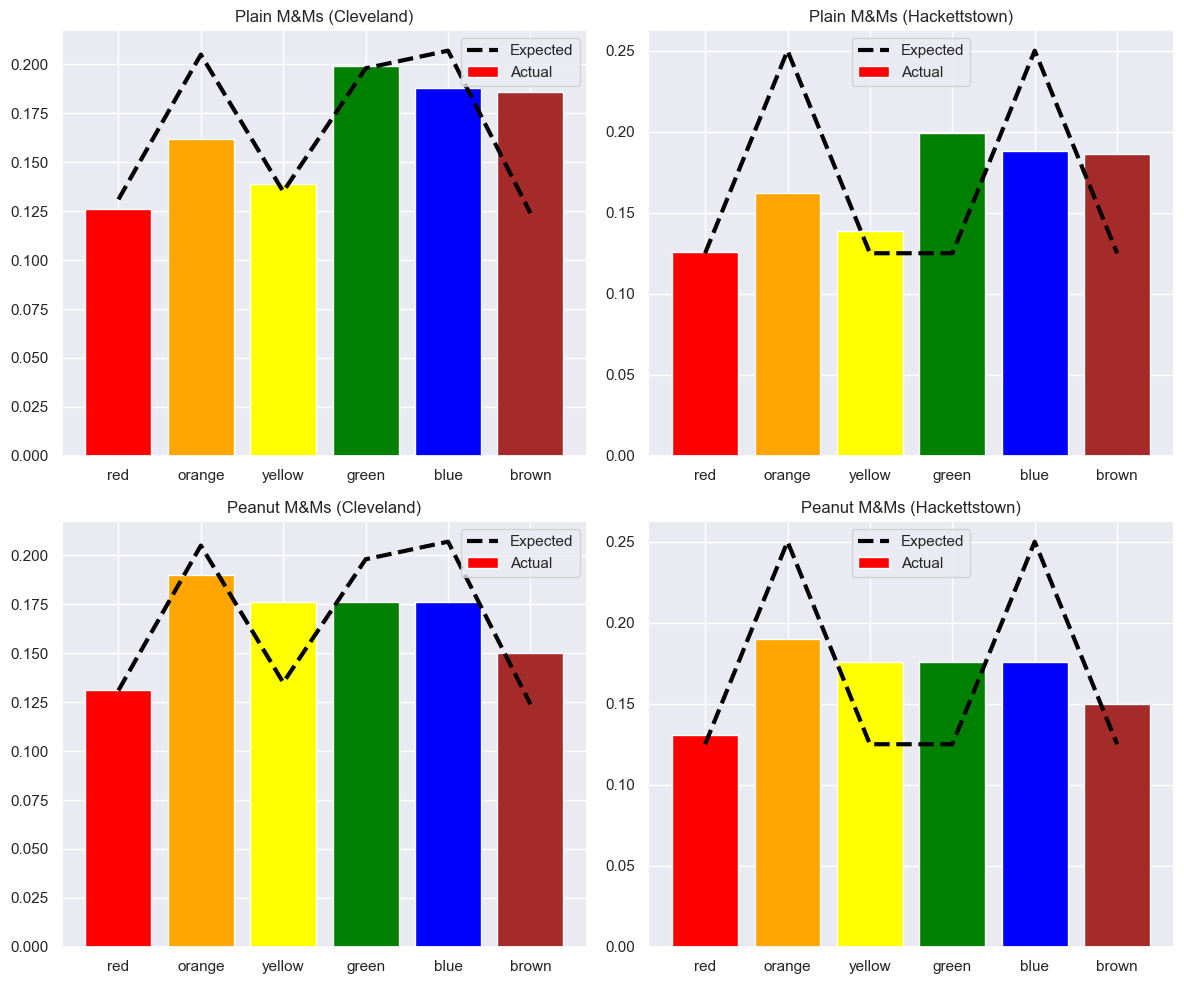

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#Plain and CLV
axs[0, 0].bar(colors, [plain_proportions[color] for color in colors], color=colors, label='Actual')
axs[0, 0].plot(colors, [clv_proportions[color] for color in colors], color='black', linewidth=3, linestyle='--', label='Expected')
axs[0, 0].set_title('Plain M&Ms (Cleveland)')
axs[0, 0].legend()

#Peanut and CLV
axs[1, 0].bar(colors, [peanut_proportions[color] for color in colors], color=colors, label='Actual')
axs[1, 0].plot(colors, [clv_proportions[color] for color in colors], color='black', linewidth=3, linestyle='--', label='Expected')
axs[1, 0].set_title('Peanut M&Ms (Cleveland)')
axs[1, 0].legend()

#Plain and HCT
axs[0, 1].bar(colors, [plain_proportions[color] for color in colors], color=colors, label='Actual')
axs[0, 1].plot(colors, [hct_proportions[color] for color in colors], color='black', linewidth=3, linestyle='--', label='Expected')
axs[0, 1].set_title('Plain M&Ms (Hackettstown)')
axs[0, 1].legend()

#Peanut and HCT
axs[1, 1].bar(colors, [peanut_proportions[color] for color in colors], color=colors, label='Actual')
axs[1, 1].plot(colors, [hct_proportions[color] for color in colors], color='black', linewidth=3, linestyle='--', label='Expected')
axs[1, 1].set_title('Peanut M&Ms (Hackettstown)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

QUESTION 3: Calculate the average and standard deviation of the M&Ms diameters and weights

In [89]:
#Plain M&Ms
plain_avg_diameter = plaindf['diameter'].mean()
plain_std_diameter = plaindf['diameter'].std()
plain_avg_mass = plaindf['mass'].mean()
plain_std_mass = plaindf['mass'].std()

#Peanut M&Ms
peanut_avg_diameter = peanutdf['diameter'].mean()
peanut_std_diameter = peanutdf['diameter'].std()
peanut_avg_mass = peanutdf['mass'].mean()
peanut_std_mass = peanutdf['mass'].std()

QUESTION 3A: Generate a normal distribution based on these values for the peanuts and the plains

In [90]:
plain_diameter_dist = norm(loc=plain_avg_diameter, scale=plain_std_diameter)
plain_mass_dist = norm(loc=plain_avg_mass, scale=plain_std_mass)
peanut_diameter_dist = norm(loc=peanut_avg_diameter, scale=peanut_std_diameter)
peanut_mass_dist = norm(loc=peanut_avg_mass, scale=peanut_std_mass)

QUESTION 3B: Use the fit function to try to learn the parameters for a normal distribution for each (measure,type) of M&M

In [91]:
plain_diameter_dist = norm.fit(plaindf['diameter'])
plain_mass_dist = norm.fit(plaindf['mass'])
peanut_diameter_dist = norm.fit(peanutdf['diameter'])
peanut_mass_dist = norm.fit(peanutdf['mass'])

print("Parameters for Plain M&Ms:")
print("Diameter - Mean:", plain_diameter_dist[0], "Std Dev:", plain_diameter_dist[1])
print("Mass - Mean:", plain_mass_dist[0], "Std Dev:", plain_mass_dist[1])

print("\nParameters for Peanut M&Ms:")
print("Diameter - Mean:", peanut_diameter_dist[0], "Std Dev:", peanut_diameter_dist[1])
print("Mass - Mean:", peanut_mass_dist[0], "Std Dev:", peanut_mass_dist[1])

Parameters for Plain M&Ms:
Diameter - Mean: 13.279199134199134 Std Dev: 0.34174686107633445
Mass - Mean: 0.8648268398268398 Std Dev: 0.046149018627879144

Parameters for Peanut M&Ms:
Diameter - Mean: 14.772352941176472 Std Dev: 0.9743768008026102
Mass - Mean: 2.5977124183006532 Std Dev: 0.3372679482707379


QUESTION 3C: Plot the histogram, hypothesized distribution, and the fitted distribution on one plot for each (measure,type) of M&M

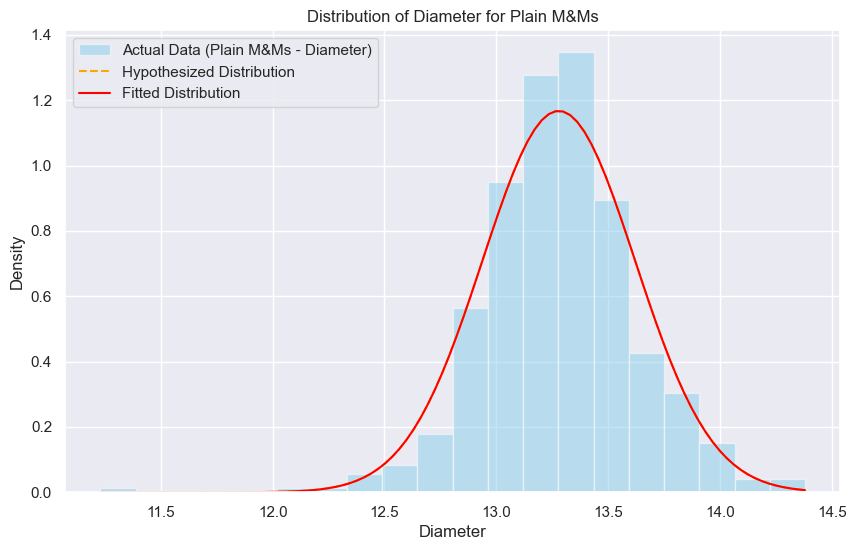

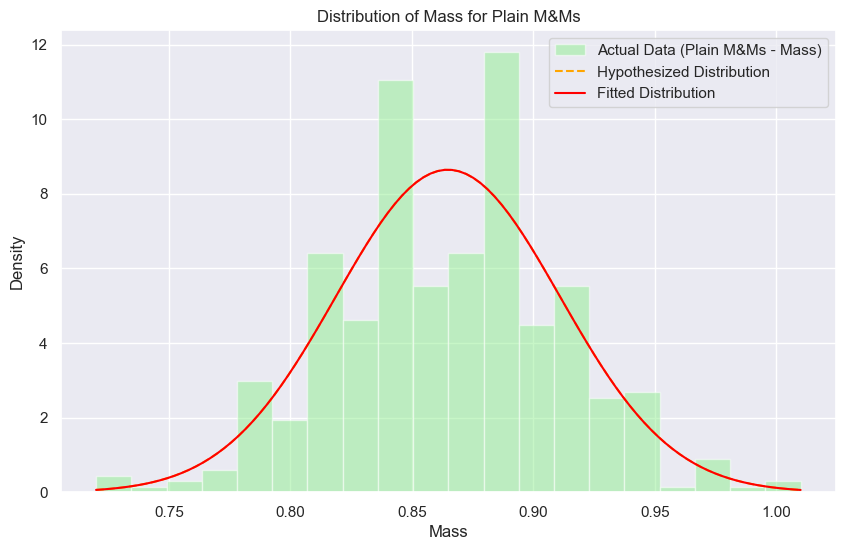

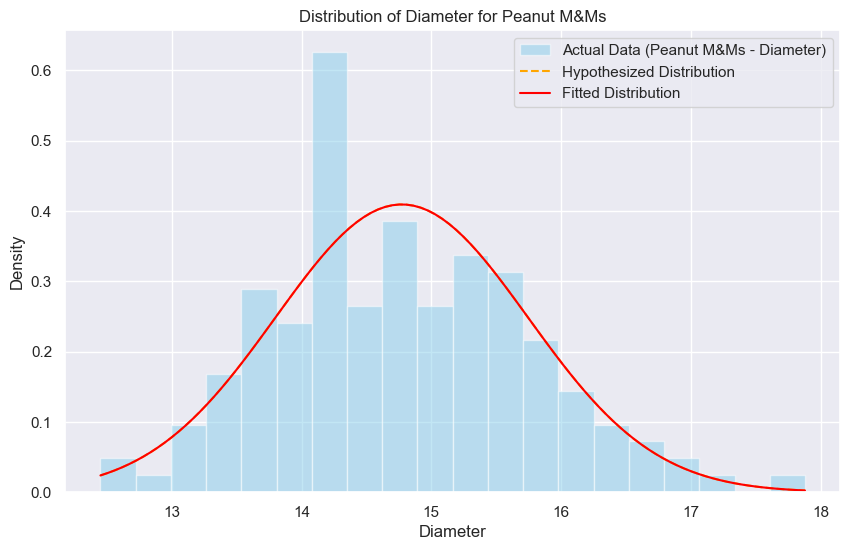

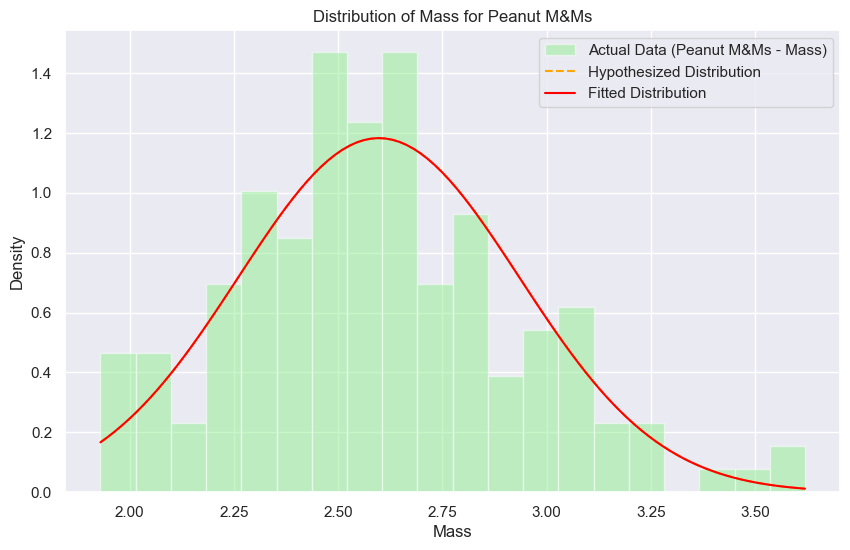

In [92]:
#Plain M&Ms - Diameter
plt.figure(figsize=(10, 6))
plt.hist(plaindf['diameter'], bins=20, density=True, alpha=0.5, color='skyblue', label='Actual Data (Plain M&Ms - Diameter)')

x = np.linspace(plaindf['diameter'].min(), plaindf['diameter'].max(), 100)
plt.plot(x, norm.pdf(x, *plain_diameter_dist), color='orange', linestyle='--', label='Hypothesized Distribution')
plt.plot(x, norm.pdf(x, *plain_diameter_dist), color='red', linestyle='-', label='Fitted Distribution')

plt.title('Distribution of Diameter for Plain M&Ms')
plt.xlabel('Diameter')
plt.ylabel('Density')
plt.legend()
plt.show()

#Plain M&Ms - Mass
plt.figure(figsize=(10, 6))
plt.hist(plaindf['mass'], bins=20, density=True, alpha=0.5, color='lightgreen', label='Actual Data (Plain M&Ms - Mass)')

x = np.linspace(plaindf['mass'].min(), plaindf['mass'].max(), 100)
plt.plot(x, norm.pdf(x, *plain_mass_dist), color='orange', linestyle='--', label='Hypothesized Distribution')
plt.plot(x, norm.pdf(x, *plain_mass_dist), color='red', linestyle='-', label='Fitted Distribution')

plt.title('Distribution of Mass for Plain M&Ms')
plt.xlabel('Mass')
plt.ylabel('Density')
plt.legend()
plt.show()

#Peanut M&Ms - Diameter
plt.figure(figsize=(10, 6))
plt.hist(peanutdf['diameter'], bins=20, density=True, alpha=0.5, color='skyblue', label='Actual Data (Peanut M&Ms - Diameter)')

x = np.linspace(peanutdf['diameter'].min(), peanutdf['diameter'].max(), 100)
plt.plot(x, norm.pdf(x, *peanut_diameter_dist), color='orange', linestyle='--', label='Hypothesized Distribution')
plt.plot(x, norm.pdf(x, *peanut_diameter_dist), color='red', linestyle='-', label='Fitted Distribution')

plt.title('Distribution of Diameter for Peanut M&Ms')
plt.xlabel('Diameter')
plt.ylabel('Density')
plt.legend()
plt.show()

#Peanut M&Ms - Mass
plt.figure(figsize=(10, 6))
plt.hist(peanutdf['mass'], bins=20, density=True, alpha=0.5, color='lightgreen', label='Actual Data (Peanut M&Ms - Mass)')

x = np.linspace(peanutdf['mass'].min(), peanutdf['mass'].max(), 100)
plt.plot(x, norm.pdf(x, *peanut_mass_dist), color='orange', linestyle='--', label='Hypothesized Distribution')
plt.plot(x, norm.pdf(x, *peanut_mass_dist), color='red', linestyle='-', label='Fitted Distribution')

plt.title('Distribution of Mass for Peanut M&Ms')
plt.xlabel('Mass')
plt.ylabel('Density')
plt.legend()
plt.show()


QUESTION 4: Calculate the average and standard deviation by color by type


In [93]:
grouped_data = data2.groupby(['color', 'type'])
avg_std_by_color_type = grouped_data.agg({'diameter': ['mean', 'std'], 'mass': ['mean', 'std']})
avg_std_by_color_type = avg_std_by_color_type.reset_index()

QUESTION 4A: Plot those distributions against the actual data overall, again, choosing the right color

top-left plot shows the distribution of diameters by color by type using boxplots,
top-right plot shows the distribution of masses by color by type using boxplots,
bottom-left plot shows the average diameter by color by type using barplots,
bottom-right plot shows the standard deviation of diameters by color by type using barplots

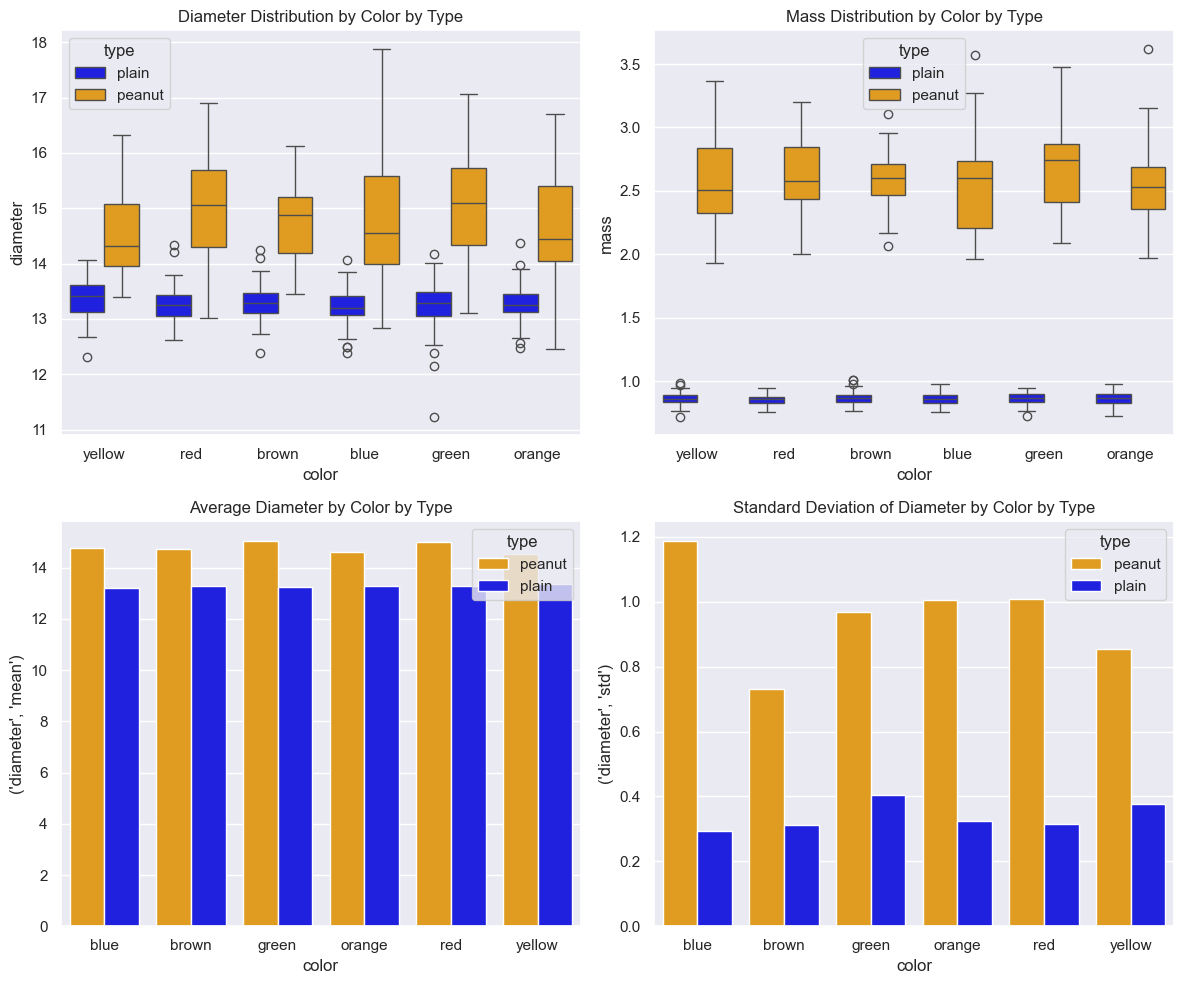

In [94]:
plt.figure(figsize=(12, 10))

#Diameter distribution
plt.subplot(2, 2, 1)
sns.boxplot(x='color', y='diameter', hue='type', data=data2, palette={'plain': 'blue', 'peanut': 'orange'})
plt.title('Diameter Distribution by Color by Type')

#Mass distribution
plt.subplot(2, 2, 2)
sns.boxplot(x='color', y='mass', hue='type', data=data2, palette={'plain': 'blue', 'peanut': 'orange'})
plt.title('Mass Distribution by Color by Type')

#Average diameter by color by type
plt.subplot(2, 2, 3)
sns.barplot(x='color', y=('diameter', 'mean'), hue='type', data=avg_std_by_color_type, palette={'plain': 'blue', 'peanut': 'orange'})
plt.title('Average Diameter by Color by Type')

#Standard deviation of diameter by color by type
plt.subplot(2, 2, 4)
sns.barplot(x='color', y=('diameter', 'std'), hue='type', data=avg_std_by_color_type, palette={'plain': 'blue', 'peanut': 'orange'})
plt.title('Standard Deviation of Diameter by Color by Type')

plt.tight_layout()
plt.show()

QUESTION 5A: Generate a random M&M color based on the plant which you believe the bag came from

In [95]:
clv_proportions = {'red': 0.131, 'orange': 0.205, 'yellow': 0.135, 'green': 0.198, 'blue': 0.207, 'brown': 0.124}

def random_color():
    return random.choices(list(clv_proportions.keys()), weights=list(clv_proportions.values()))[0]

random_color_clv = random_color()

print(random_color_clv)

blue


QUESTION 5B: Based on the color, generate a sample from the appropriate distribution for diameter

In [96]:
color_grouped_data = data2.groupby(['color'])
color_diameter_stats = color_grouped_data['diameter'].agg(['mean', 'std'])

def generate_diameter_sample(color):
    color_stats = color_diameter_stats.loc[(color)]
    mean, std = color_stats['mean'], color_stats['std']
    return np.random.normal(mean, std)

diameter_sample = generate_diameter_sample(random_color_clv)

print("Random color:", random_color_clv)
print("Diameter sample: ", diameter_sample)

Random color: blue
Diameter sample:  13.058153716674415


QUESTION 5C: Using average = 0.707 and stdev =0.047, calculate a random normally distributed value (which will be a ratio) and use that to calculate the thickness of that M&M (it will be this value * the diameter) 

In [97]:
avg_ratio = 0.707
std_ratio = 0.047

def ratio_sample():
    return np.random.normal(avg_ratio, std_ratio)

ratio_sample = ratio_sample()
thickness = ratio_sample * diameter_sample

print("Random ratio sample:", ratio_sample)
print("Thickness of the M&M:", thickness)

Random ratio sample: 0.7381558337982368
Thickness of the M&M: 9.638952344597348


QUESTION 5D: Using the following formula for an oblate spheroid, calculate a mass for the M&M: 
	4/3 pi  b^2 c, where b = the radius (diameter/20), and (c = thickness/20) (the 20 comes from cutting the diameter in half and then converting mm to cm to making density calculations consistent)


In [98]:
diameter_cm = diameter_sample / 10
thickness_cm = thickness / 10
radius = diameter_cm / 20
c = thickness_cm / 20

mass = (4/3) * np.pi * (radius**2) * c

print("Mass: ", mass)

Mass:  0.0008605815059524947


QUESTION 5E: Because these candies come from an engineering process, there will be defective candies.  It is expected that the rate of a defective per individual color differs.  Use these as the defective rates:  blue = 0.005, brown = 0.01, green = 0.1, orange = 0.02, yellow = 0.015, and red = 0.0025.  Execute a Bernoulli trial with that parameter to see if the candy is defective.  If it is defective, discard it.

In [99]:
defective_rates = {
    'blue': 0.005,
    'brown': 0.01,
    'green': 0.1,
    'orange': 0.02,
    'yellow': 0.015,
    'red': 0.0025
}

def is_defective(color):
    return np.random.rand() < defective_rates[color]

defective = is_defective(random_color_clv)

print("CANDY IS DEFECTIVE: ", defective)

CANDY IS DEFECTIVE:  False


QUESTION 5F: If the candy is deemed acceptable, add it to your bag.  Close your bag when the cumulative sum of its weight exceeds 396.9 grams.

In [116]:
avg_ratio = 0.707
std_ratio = 0.047

def ratio_sample_func():
    return np.random.normal(avg_ratio, std_ratio)

bag_weight_limit = 396.9
bag_weight = 0
bag = []
colors_in_bag = []

while bag_weight < bag_weight_limit:
    random_color_clv = random_color()
    diameter_sample = generate_diameter_sample(random_color_clv)
    ratio_val = ratio_sample_func()
    thickness = ratio_val * diameter_sample
    diameter_cm = diameter_sample / 10
    thickness_cm = thickness / 10
    radius = diameter_cm
    c = thickness_cm
    mass = (4/3) * np.pi * (radius**2) * c
    
    defective = is_defective(random_color_clv)
    
    if not defective:
        bag.append(mass)
        colors_in_bag.append(random_color_clv)
        bag_weight += mass
        

print("Total candies in the bag:", len(bag))
print("Total bag weight:", sum(bag))

Total candies in the bag: 54
Total bag weight: 405.3185242731089


QUESTION 6: Create a histogram of the result and compare it to the distribution as suggested by the manufacturing plant.

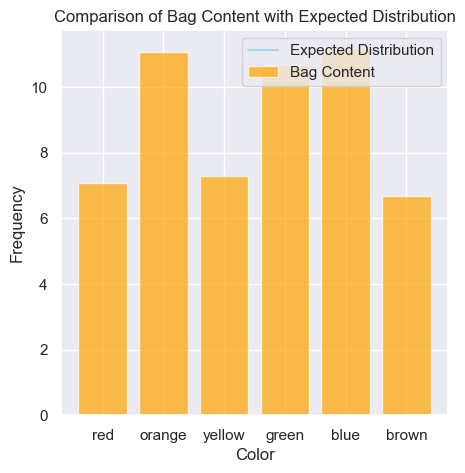

In [120]:
from collections import Counter

expected_distribution = {
    'red': 0.131,
    'orange': 0.205,
    'yellow': 0.135,
    'green': 0.198,
    'blue': 0.207,
    'brown': 0.124
}

colors = list(expected_distribution.keys())
color_counts = Counter(bag)
frequencies = [color_counts[color] for color in colors]
expected_freq = [expected_distribution[color] * len(bag) for color in colors]

plt.plot(colors, frequencies, color='skyblue', alpha=0.7, label='Expected Distribution')
plt.bar(colors, expected_freq, color='orange', alpha=0.7, label='Bag Content')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Comparison of Bag Content with Expected Distribution')
plt.legend()

plt.show()